# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- World’s Largest Asset Manager Blackrock Launches Bitcoin Private Trust Citing ‘Substantial Interest’ From Clients.  The world&#x2019;s largest asset manager, Blackrock, has launched a spot bitcoin private trust. &#x201C;Despite the steep downturn in the digital asset market, we are still seeing substantial interest from some institutional clients,&#x201D; said Blackrock. Blackrock Launches Bitcoin Trust Blackrock, the world&#x2019;s largest asset manager, has launched &#x201C;Blackrock bitcoin private trust.&#x201D; According to a Thursday blog [&#8230;] ... [| Skaityti daugiau](https://news.bitcoin.com/worlds-largest-asset-manager-blackrock-launches-bitcoin-private-trust-citing-substantial-interest-from-clients/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- CDC Drops Quarantine Recommendation After Covid-19 Exposure.  Settings including schools no longer need to screen for the virus among people without symptoms, the Centers for Disease Control and Prevention  said. ... [| Skaityti daugiau](https://www.wsj.com/articles/cdc-drops-quarantine-recommendation-following-covid-19-exposure-11660244410?mod=hp_lead_pos11) 

### Kainų kaita pandemijos metu

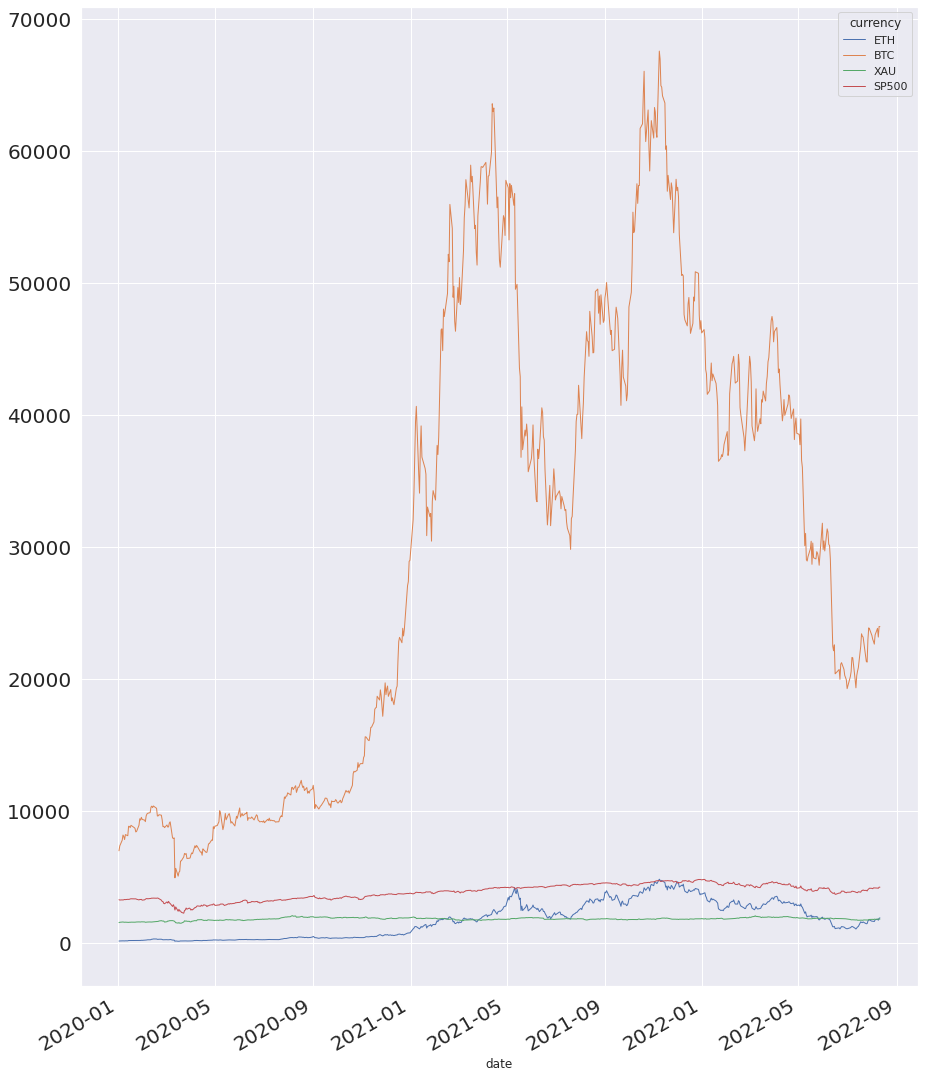

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.901958,0.248783,0.918133
BTC,0.901958,1.000000,0.201715,0.858662
XAU,0.248783,0.201715,1.000000,0.370526
SP500,0.918133,0.858662,0.370526,1.000000


In [8]:
#hide ### Koreliacijos matrica.

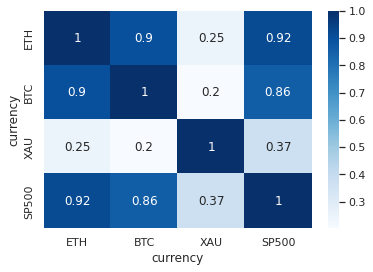

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')